In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [6]:
# Preprocessing for customers
# Encode 'Region' using Label Encoding
le = LabelEncoder()
customers['Region'] = le.fit_transform(customers['Region'])

In [7]:
# Convert 'SignupDate' to Unix timestamp
customers['SignupDate'] = pd.to_datetime(customers['SignupDate']).apply(lambda x: x.timestamp())

In [8]:
# Merge customer and transaction data
merged_data = transactions.merge(customers, on='CustomerID')

In [9]:
# Aggregate transaction data to get total quantity spent per customer
customer_transaction_data = merged_data.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'ProductID': 'nunique'
}).reset_index()

In [10]:
# Combine the profile and transaction data for clustering
features = pd.merge(customers[['CustomerID', 'Region', 'SignupDate']], customer_transaction_data, on='CustomerID')


In [11]:
# Select features for clustering
clustering_features = features[['Region', 'SignupDate', 'Quantity', 'ProductID']]

In [12]:
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

In [13]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust clusters between 2 and 10
clusters = kmeans.fit_predict(scaled_features)


C:\Users\91949\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91949\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [14]:
# Add cluster labels to the dataset
features['Cluster'] = clusters

In [15]:
# Display cluster counts
print("Cluster counts:\n", features['Cluster'].value_counts())

Cluster counts:
 Cluster
1    59
2    57
3    54
0    29
Name: count, dtype: int64


In [16]:
# Calculate Davies-Bouldin Index for evaluation
db_index = davies_bouldin_score(scaled_features, clusters)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 1.1725229823917782


In [17]:
# Calculate Silhouette Score for evaluation
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f"Average Silhouette Score: {silhouette_avg:.4f}")

Average Silhouette Score: 0.2666


In [18]:
# Display number of cluster results (using number of clusters from KMeans)
optimal_clusters = kmeans.n_clusters
print(f"Number of clusters formed: {optimal_clusters}")

Number of clusters formed: 4


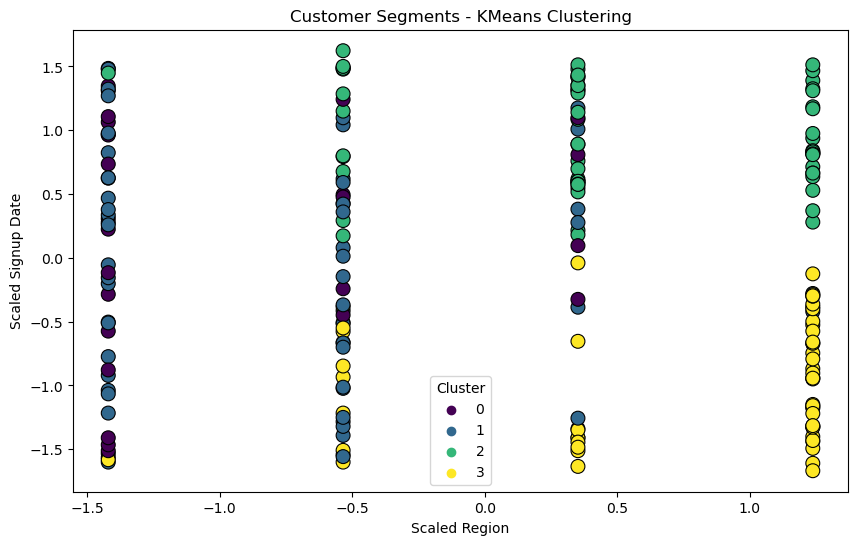

In [19]:
# Visualize clusters based on scaled features (first two components)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=scaled_features[:, 0],
    y=scaled_features[:, 1],
    hue=features['Cluster'],
    palette='viridis',
    s=100, edgecolor='black'
)
plt.title("Customer Segments - KMeans Clustering")
plt.xlabel("Scaled Region")
plt.ylabel("Scaled Signup Date")
plt.legend(title="Cluster")
plt.show()

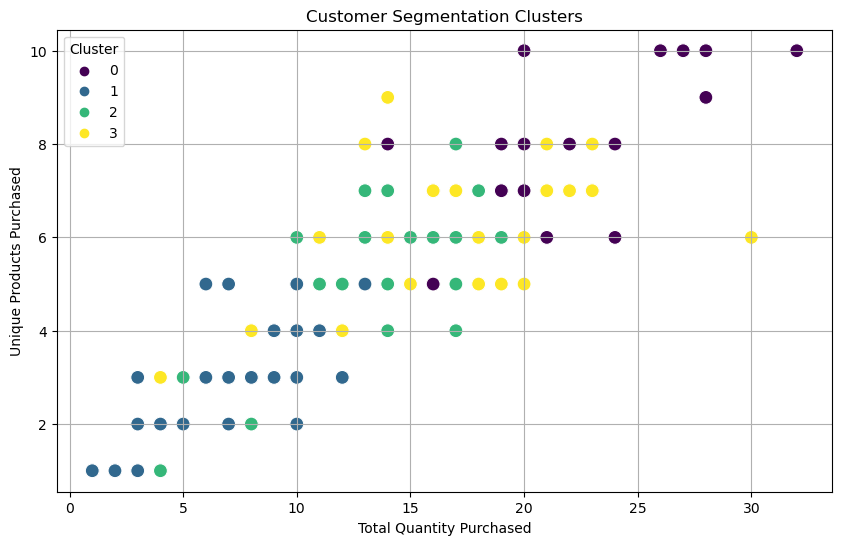

C:\Users\91949\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


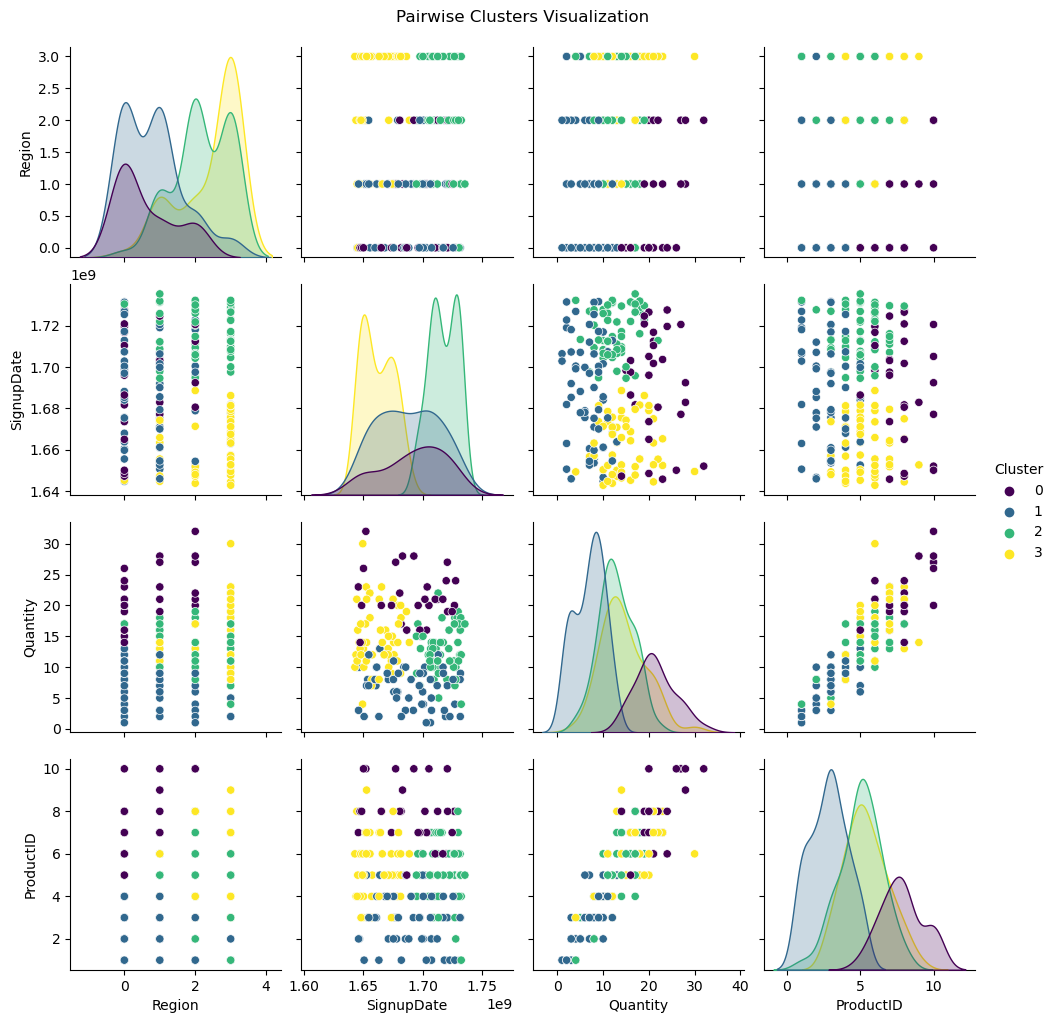

In [20]:
# Another additional clusters visualization using features DataFrame
plt.figure(figsize=(10, 6))
sns.scatterplot(data=features, x='Quantity', y='ProductID', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Segmentation Clusters')
plt.xlabel('Total Quantity Purchased')
plt.ylabel('Unique Products Purchased')
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Optionally, use pairplot for multidimensional visualization of clusters
sns.pairplot(features, hue='Cluster', palette='viridis')
plt.suptitle("Pairwise Clusters Visualization", y=1.02)
plt.show()
